# EDA (Exploratory Data Analysis)

### Loading the data

In [1]:
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score, precision_score, recall_score, f1_score, classification_report
from sklearn.utils.class_weight import compute_class_weight, compute_sample_weight
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import os

In [2]:
# fetch dataset
wine_quality = fetch_ucirepo(id=186)
# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

In [3]:
df = X.copy()
df['quality'] = y

### Exploratory Data Analysis (EDA)

In [4]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.shape

(6497, 12)

As part of the data preprocessing, we will remove **missing values (null entries)** to prevent feeding erroneous or incomplete information into the system, which could compromise the reliability of the results.  
Additionally, **duplicate entries** will be identified and eliminated to avoid data redundancy, improve computational efficiency, and reduce the risk of overfitting during the training phase of any predictive models.

In [6]:
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.duplicated().sum()

1179

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(5318, 12)

Next, **outliers are removed to enhance data quality and reliability**. Outliers can distort statistical calculations, cause models to overfit, and reduce overall accuracy. By applying the IQR method, we retain only the data points that fall within a reasonable range, improving the dataset for subsequent analysis or modeling. cambia algunas palabras

In [9]:
X = df.drop('quality', axis=1)
y = df['quality']

# Eliminar los outliers de X
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

X = X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]

# Eliminar de y las filas que se eliminaron de X
y = y[y.index.isin(X.index)]

df = X.copy()
df['quality'] = y

In [10]:
df.shape

(4224, 12)

Following, we analyze the distribution of the instances of each class. In this way, we will be able to check if the classes are unbalanced.

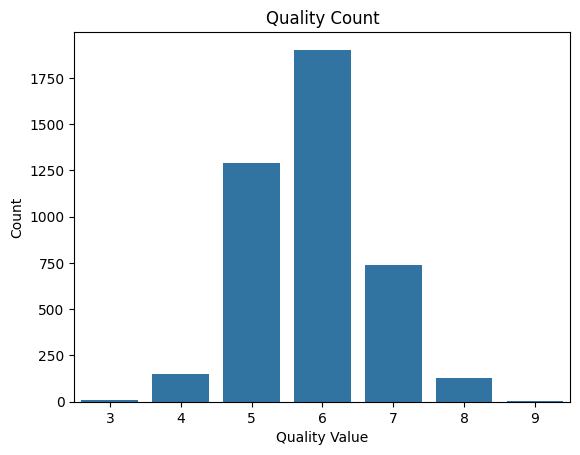

quality
6    1902
5    1290
7     738
4     149
8     130
3      10
9       5
Name: count, dtype: int64


In [11]:
sns.countplot(x=df['quality'])
plt.title('Quality Count')
plt.xlabel('Quality Value')
plt.ylabel('Count')
plt.show()

print(df['quality'].value_counts())

The dataset reveals that most instances reflect quality values ranging from 5 to 7. This observation indicates that the majority of the wines evaluated fall within a medium-quality range, suggesting a concentration of average performance rather than extreme highs or lows in quality.

We will now examine the correlation between the characteristics plotting the correlation matrix.

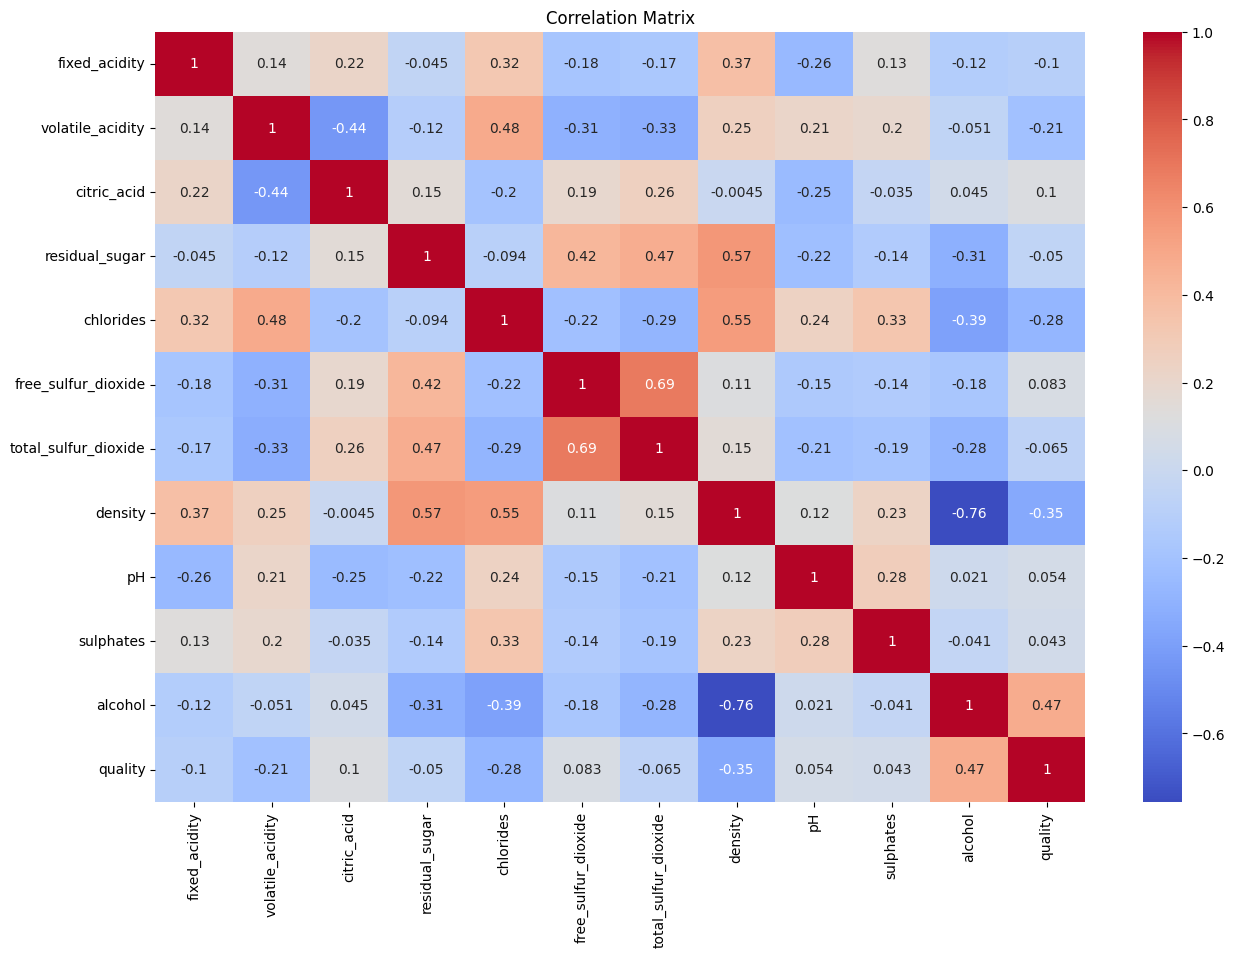

In [12]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Finally, this code trains a **Random Forest Classifier** to analyze the importance of features in predicting the target variable `quality`. It calculates the contribution of each feature using the model's `feature_importances_` attribute, sorts the features by importance, and visualizes the results in a bar chart. This helps identify which features have the most significant impact on the model's predictions.

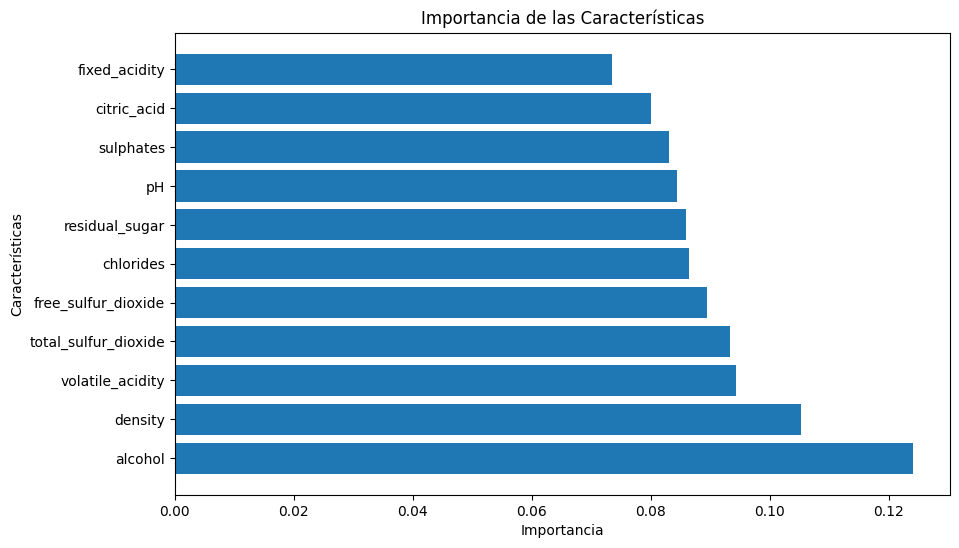

                 Feature  Importance
10               alcohol    0.124101
7                density    0.105227
1       volatile_acidity    0.094379
6   total_sulfur_dioxide    0.093274
5    free_sulfur_dioxide    0.089394
4              chlorides    0.086417
3         residual_sugar    0.085980
8                     pH    0.084502
9              sulphates    0.083157
2            citric_acid    0.080121
0          fixed_acidity    0.073449


In [13]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

X = df.drop('quality', axis=1)
y = df['quality']

# Suponiendo que tienes un dataframe X con las características y un vector y con las etiquetas
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Obtener la importancia de las características
importances = model.feature_importances_

# Crear un DataFrame con los resultados
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Ordenar por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

# Ver la lista de importancias
print(importance_df)


The feature importance analysis highlights alcohol as the most significant predictor of wine quality, which aligns with the common understanding that higher alcohol content often correlates with perceived quality in wines. However, density and volatile acidity, which also ranked highly, are typically indicators of wine's physical and chemical balance rather than direct quality markers.  
Interestingly, attributes like chlorides and sulfur dioxide levels, which are more commonly associated with wine preservation than quality, show notable influence, suggesting that stability and preservation may indirectly impact quality perception.

# Classification

## Random Forest

Hay correlaciones bastante altas en la matriz de correlaciones. Teniendo en cuenta la importancia de cada una de las features, se han decidido eliminar las columnas "density" y "free_sulfur_dioxide". Además, las features "sulphates", "residual_sugar" y "pH" tienen una correlación muy baja con la calidad del vino.

In [282]:
rf_df = df.drop(['density', 'free_sulfur_dioxide', 'sulphates'], axis=1)

In [283]:
X_train, X_test, y_train, y_test = train_test_split(rf_df.drop('quality', axis=1), rf_df['quality'], test_size=0.2,stratify=rf_df['quality'],random_state=42)

In [284]:
param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
# class_weights_dict = dict(zip(np.unique(y_train), class_weights))

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

{'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
RandomForestClassifier(max_depth=40, min_samples_leaf=2, n_estimators=300,
                       random_state=42)
0.5596345264493935


In [285]:
# Modelo con los mejores hiperparámetros
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print('Precisión:', accuracy)

Precisión: 0.5621301775147929


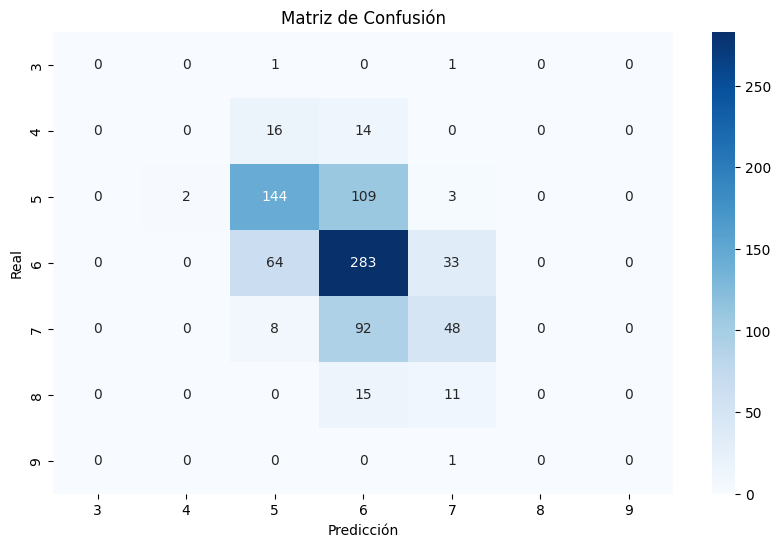

In [286]:
# Matriz de confusión
rf_conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

## Logistic Regression


In [287]:
lr_df = df.drop(['density', 'free_sulfur_dioxide', 'sulphates'], axis=1)

In [288]:
X = lr_df.drop('quality', axis=1)
y = lr_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Normalización de los datos

In [289]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

### Lasso

In [341]:
lasso_model = LogisticRegression(penalty='l1', solver='saga', C=0.1)
lasso_model.fit(x_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(x_test_scaled)
print('Precisión Lasso:', accuracy_score(y_test, y_pred_lasso))

Precisión Lasso: 0.5420118343195266


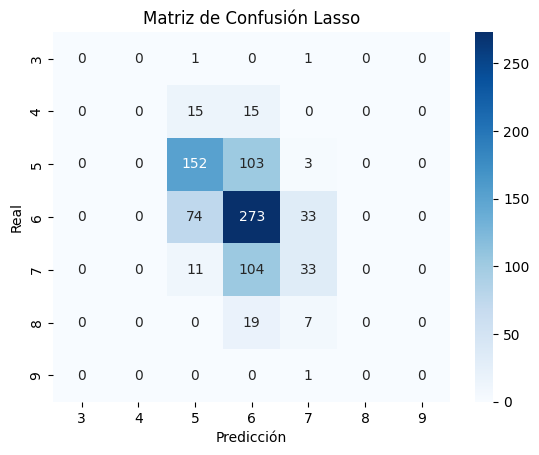

In [291]:
lasso_conf_matrix = confusion_matrix(y_test, y_pred_lasso)
sns.heatmap(lasso_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusión Lasso')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

### Ridge

In [292]:
ridge_model = LogisticRegression(penalty='l2', C=0.1)
ridge_model.fit(x_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(x_test_scaled)
print('Precisión Ridge:', accuracy_score(y_test, y_pred_ridge))


Precisión Ridge: 0.5360946745562131


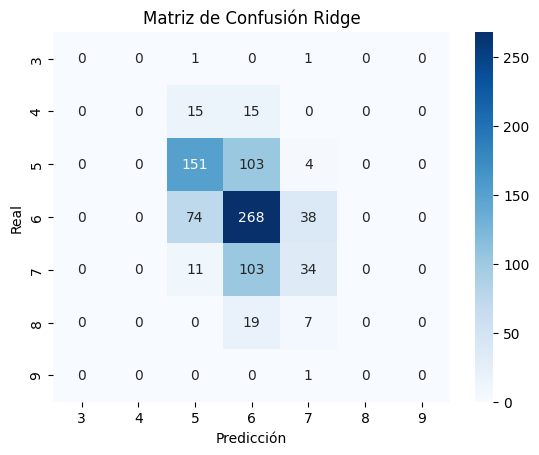

In [293]:
ridge_conf_matrix = confusion_matrix(y_test, y_pred_ridge)
sns.heatmap(ridge_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusión Ridge')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

## Ensemble


A continuación se hace un ensemble de los siguientes modelos: Random Forest, Linear Regression (Lasso) y Linear Regression (Ridge)

In [294]:
ensemble_df = df.drop(['density', 'free_sulfur_dioxide', 'sulphates'], axis=1)

In [295]:
X = ensemble_df.drop('quality', axis=1)
y = ensemble_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [296]:
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(estimators=[('lasso', lasso_model), ('ridge', ridge_model), ('random_forest', best_rf)], voting='soft')
voting_model.fit(X_train, y_train)

y_pred_voting = voting_model.predict(X_test)
print('Precisión Voting:', accuracy_score(y_test, y_pred_voting))

/home/antonio/Documentos/Universidad/Cuarto/Machine Learning/ml_2425/.venv/lib64/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/antonio/Documentos/Universidad/Cuarto/Machine Learning/ml_2425/.venv/lib64/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precisión Voting: 0.527810650887574


In [297]:
from sklearn.ensemble import StackingClassifier

stacking_model = StackingClassifier(estimators=[('lasso', lasso_model), ('ridge', ridge_model), ('random_forest', best_rf)], final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)

y_pred_stacking = stacking_model.predict(X_test)
print('Precisión Stacking:', accuracy_score(y_test, y_pred_stacking))

/home/antonio/Documentos/Universidad/Cuarto/Machine Learning/ml_2425/.venv/lib64/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/antonio/Documentos/Universidad/Cuarto/Machine Learning/ml_2425/.venv/lib64/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/antonio/Documentos/Universidad/Cuarto/Machine Learning/ml_2425/.venv/lib64/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated clas

Precisión Stacking: 0.5692307692307692


## Boosting

In [298]:
boosting_df = df.drop(['density', 'free_sulfur_dioxide', 'sulphates'], axis=1)

In [299]:
X = boosting_df.drop('quality', axis=1)
y = boosting_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [300]:
rf_base = RandomForestClassifier(n_estimators=100, random_state=42)
ada_boost = AdaBoostClassifier(estimator=rf_base, n_estimators=50, random_state=42)
gradient_boost = GradientBoostingClassifier(n_estimators=45, random_state=42)
hist_gradient_boost = HistGradientBoostingClassifier(max_iter=15, random_state=42)

In [301]:
ada_boost.fit(X_train, y_train)
gradient_boost.fit(X_train, y_train)
hist_gradient_boost.fit(X_train, y_train)

/home/antonio/Documentos/Universidad/Cuarto/Machine Learning/ml_2425/.venv/lib64/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


HistGradientBoostingClassifier(max_iter=15, random_state=42)

In [302]:
y_pred_ada = ada_boost.predict(X_test)
y_pred_gradient = gradient_boost.predict(X_test)
y_pred_hist_gradient = hist_gradient_boost.predict(X_test)

In [303]:
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print('Precisión AdaBoost:', accuracy_ada)

accuracy_gradient = accuracy_score(y_test, y_pred_gradient)
print('Precisión GradientBoost:', accuracy_gradient)

accuracy_hist_gradient = accuracy_score(y_test, y_pred_hist_gradient)
print('Precisión HistGradientBoost:', accuracy_hist_gradient)

Precisión AdaBoost: 0.5562130177514792
Precisión GradientBoost: 0.5633136094674556
Precisión HistGradientBoost: 0.5526627218934911


# Regression

## Random Forest Regressor


In [304]:
rf_df = df.drop(['density', 'free_sulfur_dioxide', 'sulphates'], axis=1)

In [305]:
X_train, X_test, y_train, y_test = train_test_split(rf_df.drop('quality', axis=1), rf_df['quality'], test_size=0.2,stratify=rf_df['quality'],random_state=42)

In [306]:
param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
# class_weights_dict = dict(zip(np.unique(y_train), class_weights))

rf_regressor = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train, sample_weight=sample_weights)

print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
RandomForestRegressor(max_depth=20, n_estimators=500, random_state=42)
0.30761167632500896


In [332]:
# Modelo con los mejores hiperparámetros
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

In [333]:
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")
print(f"Precisión: {accuracy_score(y_test, np.round(y_pred))}")

Error cuadrático medio (MSE): 0.5028738439295789
Coeficiente de determinación (R^2): 0.3357103543749813
Precisión: 0.5644970414201184


In [308]:
y_pred_round = np.round(y_pred)

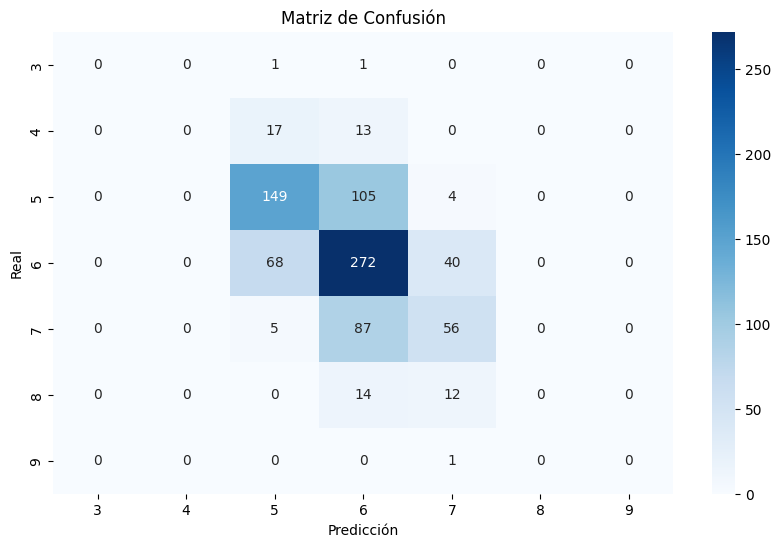

In [309]:
# Matriz de confusión
rf_conf_matrix = confusion_matrix(y_test, y_pred_round)

plt.figure(figsize=(10, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [310]:
accuracy = accuracy_score(y_test, y_pred_round)
print("Precisión:", accuracy)

Precisión: 0.5644970414201184


## Multiple Regression

In [311]:
lr_df = df.drop(['density', 'free_sulfur_dioxide', 'sulphates'], axis=1)

In [312]:
X_train, X_test, y_train, y_test = train_test_split(lr_df.drop('quality', axis=1), lr_df['quality'], test_size=0.2,stratify=rf_df['quality'],random_state=42)

In [313]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [314]:
y_pred = lr.predict(X_test)

In [315]:
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")
print(f"Precisión: {accuracy_score(y_test, np.round(y_pred))}")


Error cuadrático medio (MSE): 0.5528869171906662
Coeficiente de determinación (R^2): 0.2696437511617146
Precisión: 0.5431952662721894


## Stochastic Gradient Descent (SGD)

In [326]:
sgd_df = df.drop(['density', 'free_sulfur_dioxide', 'sulphates'], axis=1)

In [327]:
X = sgd_df.drop('quality', axis=1)
y = sgd_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [328]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [329]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter=1000, loss='squared_error', random_state=42)

In [330]:
sgd.fit(x_train_scaled, y_train)
y_pred = sgd.predict(x_test_scaled)

In [331]:
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")
print(f"Precisión: {accuracy_score(y_test, np.round(y_pred))}")


Error cuadrático medio (MSE): 0.5547536412367956
Coeficiente de determinación (R^2): 0.2671778335761169
Precisión: 0.5467455621301776


# Try best features combination

In [389]:
def classifier_algorithm_rf(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)

    param_grid = {
        'n_estimators': [300, 500],
        'max_depth': [20, 30, 40],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [2, 4],
    }

    rf = RandomForestClassifier(random_state=42)

    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_rf = grid_search.best_estimator_
    y_pred = best_rf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    return accuracy, f1, precision, recall

def classifier_algorithm_lr(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)

    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(X_train)
    x_test_scaled = scaler.transform(X_test)

    lasso_model = LogisticRegression(penalty='l1', solver='saga', C=0.1)
    lasso_model.fit(x_train_scaled, y_train)
    y_pred_lasso = lasso_model.predict(x_test_scaled)

    accuracy = accuracy_score(y_test, y_pred_lasso)
    f1 = f1_score(y_test, y_pred_lasso, average='weighted')
    precision = precision_score(y_test, y_pred_lasso, average='weighted')
    recall = recall_score(y_test, y_pred_lasso, average='weighted')
    return accuracy, f1, precision, recall

In [390]:
import itertools

def combinacines_df(df):
    combinaciones = []
    for i in range(4, len(df.columns)+1):
        combinaciones.extend(list(itertools.combinations(df.columns, i)))
    return combinaciones

In [391]:
def guardar_en_csv(combinacion,accuracy, f1, precision, recall,file_path):
    if not os.path.exists(file_path):
        with open(file_path, 'w') as f:
            f.write('combinacion,accuracy,f1,precision,recall\n')
    with open(file_path, 'a') as f:
        f.write(f'{combinacion},{accuracy},{f1},{precision},{recall}\n')

In [392]:
combinaciones = combinacines_df(df.drop('quality', axis=1))

import warnings
warnings.filterwarnings('ignore')  # Ignora todos los warnings

for combinacion in combinaciones:
    X = df[list(combinacion)]
    y = df['quality']
    accuracy_lr, f1_lr, precision_lr, recall_lr = classifier_algorithm_lr(X, y)
    guardar_en_csv(combinacion,accuracy_lr, f1_lr, precision_lr, recall_lr,'resultados_lr.csv')

for combinacion in combinaciones:
    X = df[list(combinacion)]
    y = df['quality']
    accuracy_rf, f1_rf, precision_rf, recall_rf = classifier_algorithm_rf(X, y)
    guardar_en_csv(combinacion,accuracy_rf, f1_rf, precision_rf, recall_rf,'resultados_rf.csv')

# Clustering

In [14]:
X = df.drop('quality', axis=1)
y = df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['quality'] = y

In [15]:
from plotly import express as px

fig = px.scatter_3d(
    pca_df, x='PCA1', y='PCA2', z='PCA3', 
    color='quality', color_continuous_scale='viridis',
    title='Reducción de Dimensionalidad con PCA (3D)',
    labels={'quality': 'Calidad', 'PCA1': 'Componente 1', 'PCA2': 'Componente 2', 'PCA3': 'Componente 3'}
)

# Mostrar el gráfico interactivo
fig.show()